# 1. Pre-Processing & EDA

<h3> Reading and manipulating the dataset using the Python Programming Language </h3>

<b>Importing necessary packages</b>

The following Packages are used for to conduct all the Tasks:
1. Pandas - For Data Manipulation & Data Visualisation. (<i>Ieuan, G. (2023)</i>)
2. Matplotlib - Utilised in Combination with Pandas for Data Visualisation. (<i>Ieuan, G. (2023)</i>)
3. Statsmodels - A statistics module, that simplifies the completion of a linear regression. (<i>Ieuan, G. (2023)</i>)
4. Scipy: A Python library for scientific computing and technical computing with a wide range of features. (<i> (SciPy, n.d.)</i>)
5. Stats: A Scipy module that provides a variety of functions and classes for statistical analysis. (<i>Statistical functions (scipy.stats) — SciPy v1.11.3 Manual, n.d.)</i>

In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats 


<b>Importing the Dataset</b>

Reading the csv dataset called diamonds using the read function from Pandas

In [287]:
# Reading the diamonds CSV file into a Pandas DataFrame
df = pd.read_csv("./diamonds.csv")
# Outputting the five rows of the diamonds dataset
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [288]:
# Printing a summary of the diamonds dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Above summary concludes. 
- Column: Represents the columns of the dataset. Here there is 10 Columns.
- Non-Null Count: The number of non-null values in each column. Here there is no null values.
- Dtype:  dtype of each column. Here 6 of them are float64, 2 of them are int64, 3 of them are object(3)

<b>Checking Missing values</b>

In [289]:
# Returning the total number of missing values on each column from the dataset
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Thhere is no null values in the dataset.

<b>Reducing irrelevant data from Dataset</b>

In the dataset there is an unnamed column. We can drop that column. As it is the first column we can dop that using iloc (<i>(How to Drop First Column in Pandas DataFrame (3 Methods) - Statology, 2021)</i>).

In [290]:
# here we are selecting all the rows and column from the dataset and droping the first column.
df = df.iloc[: , 1:]

df.iloc selects all the rows and columns based on their position. [:,1:] here before the comma : means select all the rows and 1: select all the columns except the first one. 

In [291]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Our given Dataset is based on diamond rings. When choosing a diamond ring, there are four key factors to consider: color, clarity, carat, and cut.<br> These four factors, often referred to as the 4Cs, have a significant impact on the appearance, value, and durability of a diamond. <i>(What are the factors that determine the price of diamonds?, n.d.)</i>
- Cut: Cut is the most important of the 4 Cs because it determines how much light the diamond reflects and refracts, creating the characteristic sparkle and scintillation.
- Color: All diamonds are graded by color. Although they are transparent but as the color gets worst it became yellowish.
- Clarity: Diamonds have tiny flaws called inclusions. Fewer inclusions mean higher clarity and more value.
- Carats: Diamonds are measured in carats. More carats means a bigger diamond. (<i>Diamond Buying Guide – The 4 Cs, n.d.</i>)

As stated before that cut is the most important of the 4 C's. Cut is mainly depends on the depth(depth Percent) and table (<i>Fried, Understanding Diamond Depth Percent and Table, 2023</i>). <br>We already have the cut as a feature we don't want to use depth and table for statistical analysis. Also for the x(length) , y(width), z(depth) which gives depth percent using these formula: 2𝑧/(𝑥 +𝑦). We need to remove them as well



In [292]:
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [293]:
mod_df = df.drop(['depth','table','x','y','z'], axis=1, inplace=True)


In [294]:
df.head()

,carat,cut,color,clarity,price
0,0.23,Ideal,E,SI2,326
1,0.21,Premium,E,SI1,326
2,0.23,Good,E,VS1,327
3,0.29,Premium,I,VS2,334
4,0.31,Good,J,SI2,335


<b>Modifying features</b>

Among the 4Cs 3 of them has Categorical value. We cannot analyze categorical value. We need to convert this into numerical values.

In [295]:
#getting unique values from clarity column
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

The clarity from best to worst is FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3.(<i>Diamond Clarity | Clarity Chart, Scale, & Your FAQs Answered, n.d.</i>). We do not have the FL,I2,I3. So we are using remaining ones as order. IF being the best and I1 being the worst. There numerical value is from 1(worst) to 8(best) according to there ratings.

In [296]:
# adding a new column called clarity_rating based on clarity column using map
df["clarity_rating"] = df['clarity'].map({'I1': 1,'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6 , 'VVS1': 7, 'IF': 8})

Added a new column as numerical value for the clarity column.

In [297]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

There is color from D-Z.We are using only the ones that found in our datasets.The color from best to worst is D, E, F, G, H, I, J.(<i>(Diamond Buying Guide – The 4 Cs, n.d.)</i>). D being the best and J being the worst. There numerical value is from 1(worst) to 7(best) according to there ratings.

In [298]:
# adding a new column called color_rating based on color column using map
df["color_rating"] = df['color'].map({'J': 1,'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6 , 'D': 7})

Added a new column as numerical value for the color column.

There is cut from Ideal to Very Poor. We are using only the ones that are found in our datasets(<i>Brilliance, n.d.</i>). The cut from best to worst is Ideal, Premium, Very Good, Good, Fair. Ideal is the best, and Very Poor is the worst. The numerical value is from 1 (worst) to 5 (best).

In [299]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [300]:
# adding a new column called cut_rating based on cut column using map
df["cut_rating"] = df['cut'].map({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4,'Ideal': 5})

Added a new column as numerical value for the color column.


In [301]:
df.head()

,carat,cut,color,clarity,price,clarity_rating,color_rating,cut_rating
0,0.23,Ideal,E,SI2,326,2,6,5
1,0.21,Premium,E,SI1,326,3,6,4
2,0.23,Good,E,VS1,327,5,6,2
3,0.29,Premium,I,VS2,334,4,2,4
4,0.31,Good,J,SI2,335,2,1,2


Here above we manipulated the datasets of cut,color, clarity to give it a numerical value rather than a categorical value.

<Axes: title={'center': 'Distribution according to Carat'}, xlabel='Carat', ylabel='Frequency'>

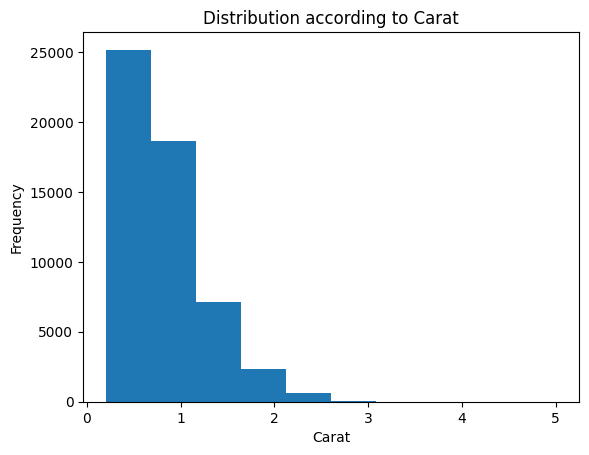

In [302]:
# ploting a histogram to check the frequency based on carat
df["carat"].plot(kind='hist',xlabel='Carat',title='Distribution according to Carat')


The bar chart shows the distribution of diamond carat in a given dataset. The x-axis of the histogram shows the carat weight, and the y-axis shows the number of diamonds in each carat bin. also we can see most of the diamond carat size lies between the 0 to 1.3 mark.

<Axes: title={'center': 'Distribution according to Cut'}, xlabel='cut', ylabel='Frequency'>

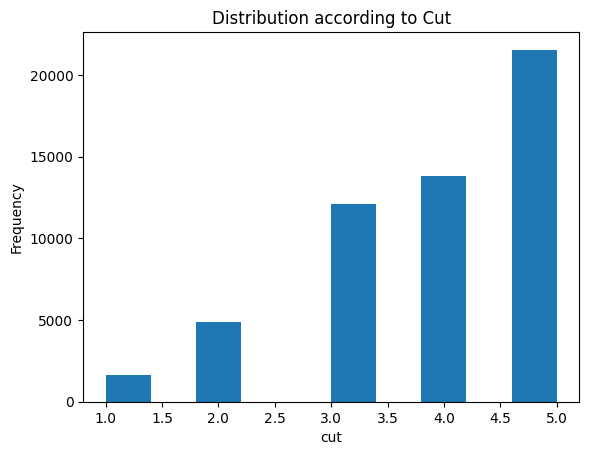

In [303]:
# ploting a histogram to check the frequency based on cut
df["cut_rating"].plot(kind='hist',xlabel='cut',title='Distribution according to Cut')


The bar chart shows the distribution of diamond cuts in a given dataset. The x-axis of the bar chart shows the different diamond cuts, and the y-axis shows the number of diamonds in each cut category. Most of the diamonds lies in the ideal Category.

<Axes: title={'center': 'Distribution according to Color'}, xlabel='color', ylabel='Frequency'>

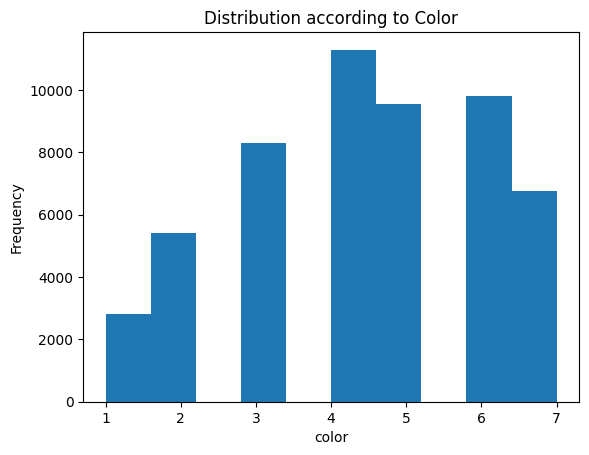

In [304]:
# ploting a histogram to check the frequency based on color
df["color_rating"].plot(kind='hist',xlabel='color',title='Distribution according to Color')


The bar chart shows the distribution of diamond color in a given dataset. The x-axis of the bar chart shows the different diamond colors, and the y-axis shows the number of diamonds in each color category. Most of the diamonds lies in the G Category.

<Axes: title={'center': 'Distribution according to Clarity'}, xlabel='clarity', ylabel='Frequency'>

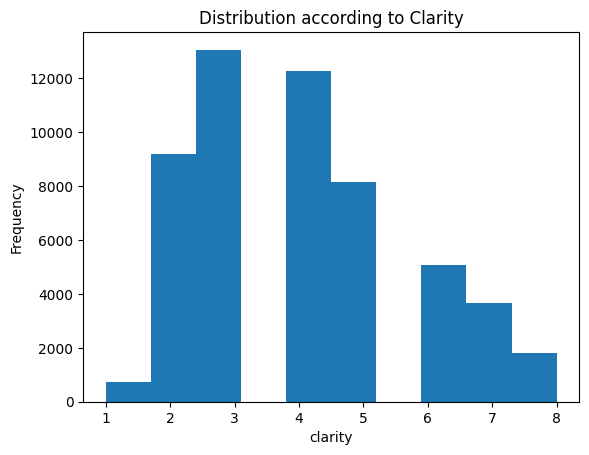

In [305]:
# # ploting a histogram to check the frequency based on clarity
df["clarity_rating"].plot(kind='hist',xlabel='clarity',title='Distribution according to Clarity')


The bar chart shows the distribution of diamond clarity in a given dataset. The x-axis of the histogram shows the different diamond clarity grades, and the y-axis shows the number of diamonds in each clarity grade category.The most common diamond clarity grade in the dataset is SI1.

<Axes: title={'center': 'Price vs Carat'}, xlabel='carat', ylabel='price'>

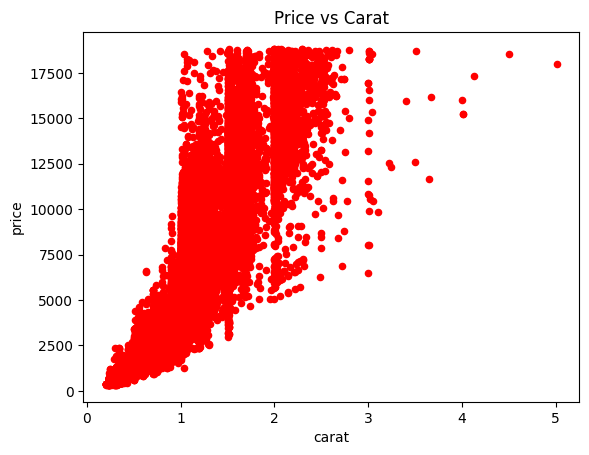

In [306]:
# ploting a scatterplot for price vs carat
df.plot(kind="scatter", x="carat", y="price",color='red',  title="Price vs Carat")

This plot shows a line graph of price vs carat for diamond ring. The price is on the y-axis and the carat is on the x-axis. The line is sloping upwards, which means that as the carat increases, the price also increases. This is because diamond ring with higher carat size are more rare and valuable.
The graph is labeled "price vs carat" and has the following axis labels:<br>
X-axis: carat<br>
Y-axis: Price<br>
Overall, the plot shows that there is a positive correlation between price and carat for diamond ring. This means that diamond ring with higher carat are more expensive.

<Axes: title={'center': 'Price vs Clarity'}, xlabel='clarity', ylabel='price'>

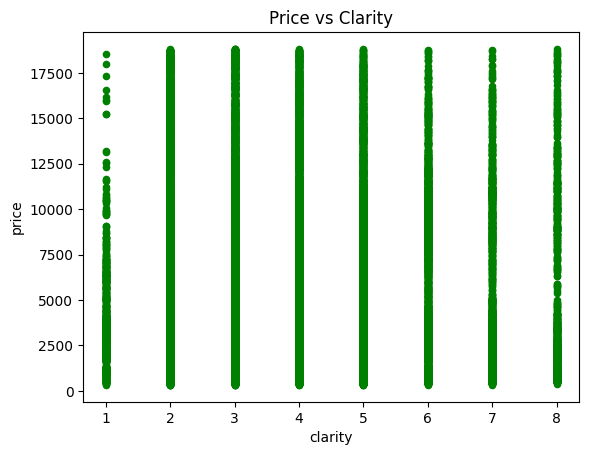

In [307]:
# ploting a scatterplot for price vs clarity
df.plot(kind="scatter", x="clarity_rating", y="price",color='green', xlabel='clarity',title="Price vs Clarity")


This plot a line graph of price vs clarity for diamond ring. The price is on the y-axis and the clarity is on the x-axis. The line is sloping upwards, which means that as the clarity increases, the price also increases. This is because diamond ring with higher clarity are more rare and valuable.
The graph is labeled "Price vs Clarity" and has the following axis labels:<br>
X-axis: Clarity<br>
Y-axis: Price<br>
Overall, the plot shows that there is a positive correlation between price and clarity for diamond ring. This means that diamond ring with higher clarity are more expensive.

<Axes: title={'center': 'Price vs Color'}, xlabel='color', ylabel='price'>

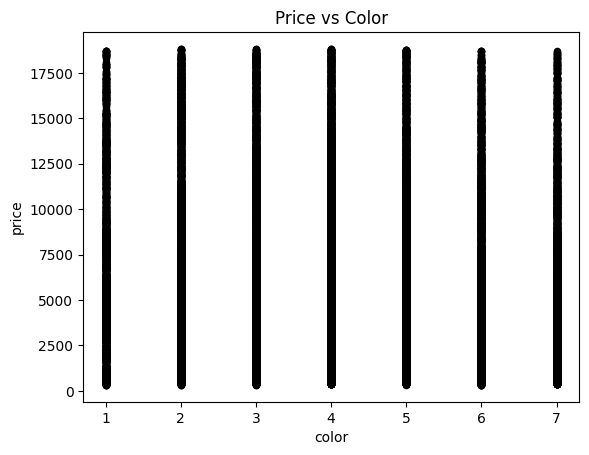

In [308]:
# ploting a scatterplot for price vs color
df.plot(kind="scatter", x="color_rating", y="price",color='black', xlabel='color', title="Price vs Color")


The plot  shows a line graph of price against color for a diamond ring. The price is on the y-axis and the color is on the x-axis. The line is sloping upwards, which means that as the color changes, the price also increases. 
The graph is labeled "Price vs Color" and has the following axis labels:<br>
-X-axis: Color<br>
-Y-axis: Price<br>
Overall, the plot shows that there is a positive correlation between price and color for the diamond ring. This means that the diamond ring is more expensive in certain colors

<Axes: title={'center': 'Price vs Cut'}, xlabel='cut', ylabel='price'>

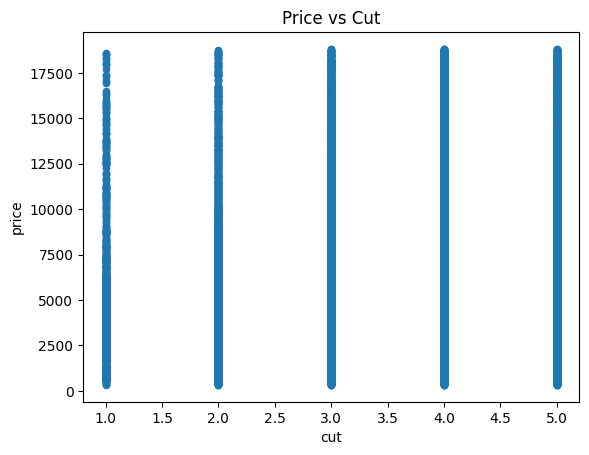

In [309]:
# ploting a scatterplot for price vs cut
df.plot(kind="scatter", x="cut_rating", y="price",xlabel='cut',title="Price vs Cut")


The plot shows a line graph of the relationship between price and cut. The line is increasing, which means that as the cut increases, the price also increases. This is because a higher cut diamond is more rare and valuable.
The graph is labeled "Price vs Cut" and has the following axis labels:<br>
-X-axis: Cut<br>
-Y-axis: Price<br>
Overall, the figure shows that there is a positive correlation between price and cut for diamonds. This means that diamonds with a higher cut are more expensive.

In [310]:
print(df['price'].max())
print(df['price'].min())

18823
326


price    Axes(0.125,0.11;0.775x0.77)
dtype: object

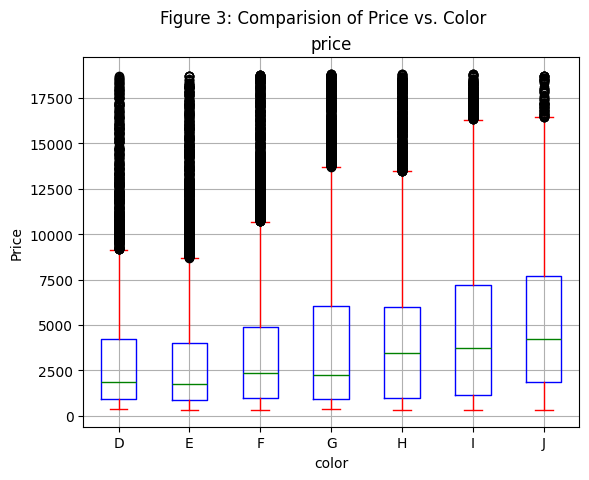

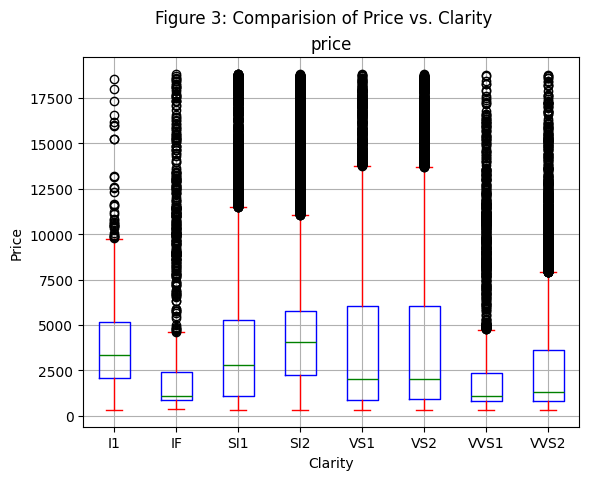

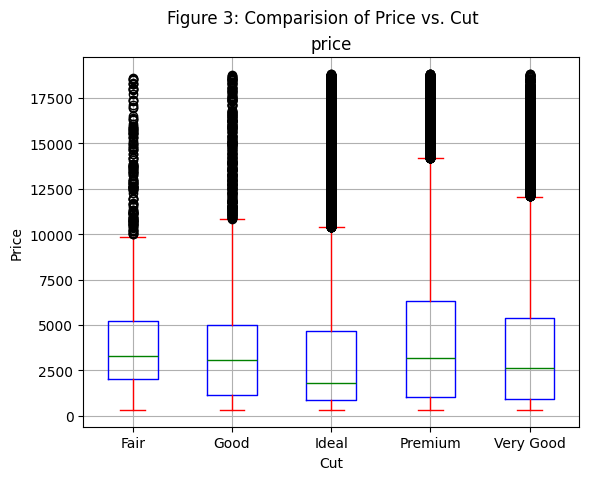

In [311]:
# ploting a boxplot for price vs color
df.plot(kind="box", by="color", column=["price"],
                color=dict(boxes='b', whiskers='r', medians='g', caps='r'),
                title="Figure 3: Comparision of Price vs. Color",
                xlabel='color',
                ylabel="Price",
                grid=True)
# ploting a boxplot for price vs clarity
df.plot(kind="box", by="clarity", column=["price"],
                color=dict(boxes='b', whiskers='r', medians='g', caps='r'),
                title="Figure 3: Comparision of Price vs. Clarity",
                xlabel='Clarity',
                ylabel="Price",
                grid=True)

# ploting a boxplot for price vs color
df.plot(kind="box", by="cut", column=["price"],
                color=dict(boxes='b', whiskers='r', medians='g', caps='r'),
                title="Figure 3: Comparision of Price vs. Cut",
                xlabel='Cut',
                ylabel="Price",
                grid=True)


Above the 3 box plot has a lot of outliers which may cause problem. it can be difficult to calculate the average price relativly to their features accurately. This is because outliers can skew the data.

Overall Preliminary investigation of the Diamond dataset proposed that it's a big and complicated dataset. This complex dataset also advice that apart from color or carat other features can also affect the price.Further analysis of the dataset is needed to better understand the relationships between these features.


# 2.Statistical Analysis

<h3>Hypothesis Testing: Test for Normality</h3>

The most fundamental test we almost always need to undertake before selecting a hypothesis test. Is determining whether or not our data is normally distributed (and thus, not skewed).

This test will change whether we use:
- <b>Parametric Tests</b>: Tests that use the arithmetric mean as the basis for the test.
- <b>Non-Parametric tests</b>: Tests that use the median as the basis for the test.

<b>Parametric Tests</b> require that the data is <u> Normally Distributed </u>, whilst <b>Non-Parametric tests</b> do not.

### Comparing two Independent Variables


<b>Is the population mean equal for prices, different between IF clarity and I1 clarity?</b>

In [312]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

There are two independent variables here. One is an l1 in clarity scale which is the worst and the other one is IF in clarity scale which is the best. Both of the diamonds have prices. The price are not taken on the same diamond because same diamond cannot have two different clarity. 

<b> Now we need to state the null hypothesis and alternative hypothesis: </b>

<u>Null hypothesis</u> is that the population mean prices are equal for the two groups: H0 : μ_IF = µ_I1 <br>
<u>Alternative hypothesis</u> is that the population mean prices are not equal for the two groups: H1 : μ_IF ≠ μ_I1

In [313]:
i1_clarity = df["clarity"] == "I1"
iF_clarity = df["clarity"] == "IF"

i1_df = df[i1_clarity]
if_df = df[iF_clarity]

In [314]:
i1_df.head()

,carat,cut,color,clarity,price,clarity_rating,color_rating,cut_rating
15,0.32,Premium,E,I1,345,1,6,4
172,1.17,Very Good,J,I1,2774,1,1,3
215,1.01,Premium,F,I1,2781,1,5,4
241,1.01,Fair,E,I1,2788,1,6,1
315,0.96,Ideal,F,I1,2801,1,5,5


In [315]:
if_df.head()


,carat,cut,color,clarity,price,clarity_rating,color_rating,cut_rating
229,0.52,Ideal,F,IF,2783,8,5,5
250,0.55,Ideal,G,IF,2789,8,4,5
256,0.64,Ideal,G,IF,2790,8,4,5
281,0.72,Premium,I,IF,2795,8,2,4
304,0.60,Very Good,G,IF,2800,8,4,3


<b> Checking Normal Distribution: </b>


We need to use the density plot to see if it's normally distributed.

<Axes: ylabel='Density'>

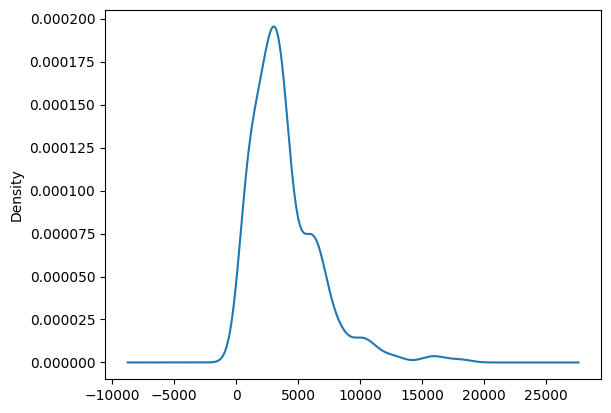

In [316]:
i1_df["price"].plot(kind="density")

<Axes: ylabel='Density'>

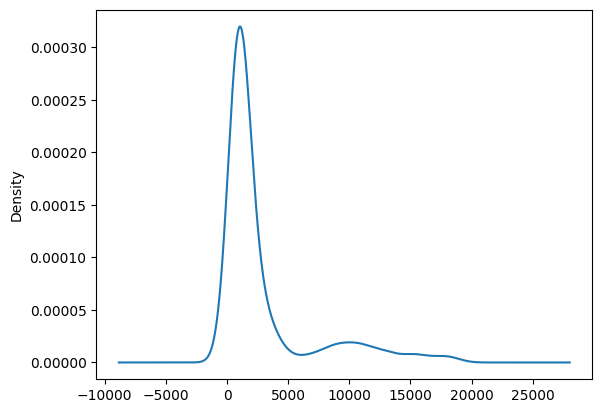

In [317]:
if_df["price"].plot(kind="density")


It's not fully clear from the two plots that the data is significantly skewed, and whether or not if the sample could have been derived from a normal distribution or not. To clarify, a Shaprio-Wilks normality test will be conducted.


In [318]:
i1_norm = stats.shapiro(i1_df["price"])
if_norm = stats.shapiro(if_df["price"])

print(f"I1 Data (Normality Test): \n{i1_norm}\n")
print(f"IF Data (Normality Test): \n{if_norm}\n")

I1 Data (Normality Test): 
ShapiroResult(statistic=0.8607962131500244, pvalue=4.451676194516057e-25)

IF Data (Normality Test): 
ShapiroResult(statistic=0.5879533290863037, pvalue=0.0)



The null hypothesis of the test assumes that the data is normally distributed. However, we can reject the null hypothesis in favor of the alternative hypothesis (that the data is not normally distributed) at the 1% significance level.

As such, we need to utilize a <u>Non Parametric Test</u>: <b>Wilcoxon Mann Whitney test</b>

- H0: The Prices between the two groups is equal. μ_IF = μ_I1
- H1: The Prices between the two groups is not equal. μ_IF ≠ μ_I1

In [319]:
stats.mannwhitneyu(i1_df["price"], if_df["price"], alternative="two-sided")

MannwhitneyuResult(statistic=968607.5, pvalue=1.842576544356783e-74)

At the 5% significant level, the pvalue is lower than the 1%. For that we reject the null hypothesis. There is a significant difference in prices between the I1 and IF clarity diamond ring.


clarity
I1    Axes(0.125,0.11;0.775x0.77)
IF    Axes(0.125,0.11;0.775x0.77)
Name: price, dtype: object

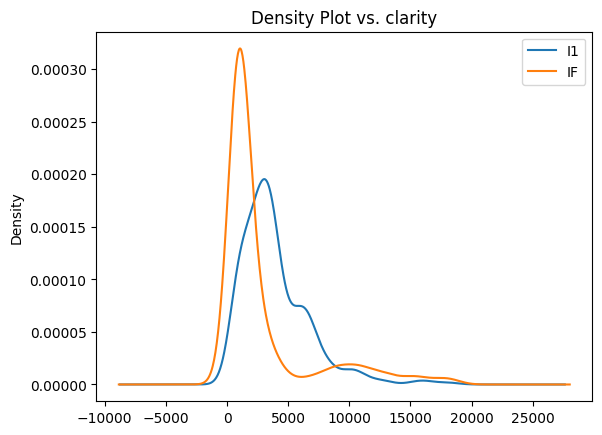

In [320]:
df_f = df[df['clarity'].isin(['IF', 'I1'])]
df_f.groupby("clarity")["price"].plot.kde(title="Density Plot vs. clarity",
                                   ylabel="Density",
                                   xlabel="Price",
                                   legend=['I1', 'IF'])

price    Axes(0.125,0.11;0.775x0.77)
dtype: object

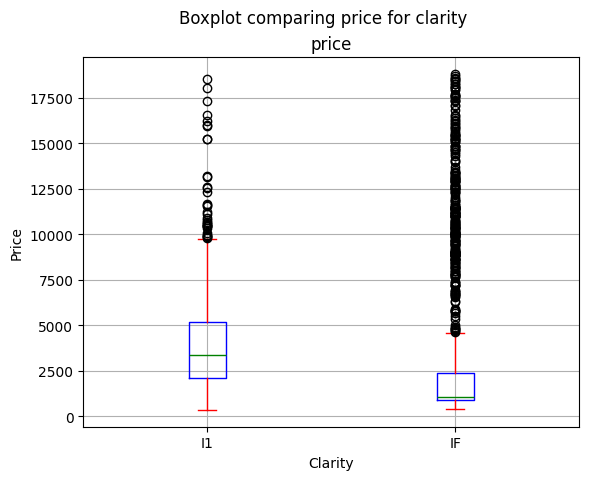

In [321]:
df_f.plot(kind="box", by="clarity", column="price", 
        color=dict(boxes='b', whiskers='r', medians='g', caps='r'),
        title="Boxplot comparing price for clarity",
        ylabel="Price",
        xlabel="Clarity",
        grid=True)


Based on the figures, the medians of the two groups (IF and I1) are not contained within each other, and the Q1, Q2, and Q3 values differ significantly. This further supports the results of the hypothesis test.(<i>Ieuan 2023,p-31</i>)

### Correlation Analysis

<b>Is there a correlation between price and carate of the diamonds?</b>

#### Hypothesis

Hypothesis of Correlation Analysis between price and carat:<br>
<u>Null hypothesis (H0)</u>: There is no correlation between price and carat.<br>
<u>Alternative hypothesis (H1)</u>: There is a correlation between price and carat.

#### Assumption:

- Variables are Quantitative
- Variables are Normally Distributed
- Variables have no outliers.
- Linear Relationship.

##### Assumptioon 1: Variables are Quantitative

In [322]:
df.dtypes

carat             float64
cut                object
color              object
clarity            object
price               int64
clarity_rating      int64
color_rating        int64
cut_rating          int64
dtype: object

Carat has a data type of float64 and price has int64. All the Data types are numeric both the price and carat. That means they are quantitative.

##### Assumption 2: Checking if they are Normally distributed or not

<Axes: ylabel='Density'>

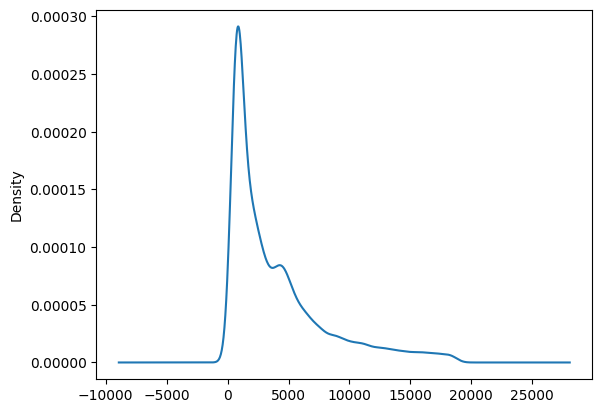

In [323]:
df["price"].plot(kind="density")

<Axes: ylabel='Density'>

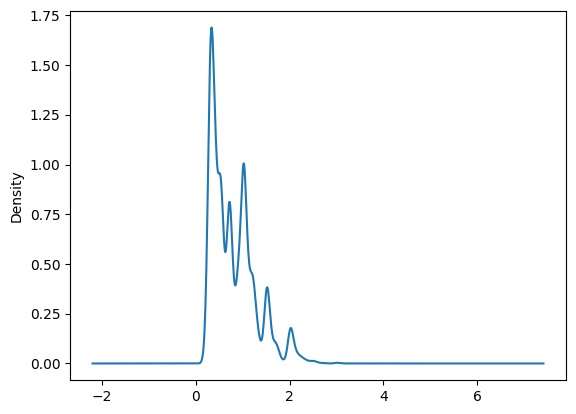

In [324]:
df["carat"].plot(kind="density")

It's not fully clear from the two plots that the data is significantly skewed, and whether or not if the sample could have been derived from a normal distribution or not. To clarify, a Shaprio-Wilks normality test will be conducted.


In [325]:
print(f"Assumption test: Normality [price] | {stats.shapiro(df['price'])}")
print(f"Assumption test: Normality [carat] | {stats.shapiro(df['carat'])}")

Assumption test: Normality [price] | ShapiroResult(statistic=0.798107922077179, pvalue=0.0)
Assumption test: Normality [carat] | ShapiroResult(statistic=0.8938943147659302, pvalue=0.0)


c:\Users\kazia\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In order to conduct a pearson's correlation, we need to ensure that the data for both groups in normally distributed. Whilst at the 5% significance level, which they are not that means they are not normally distributed.

##### Assumption 3: Checking if they outliers or not

<Axes: title={'center': 'Correlation of price vs. carat'}, xlabel='Carat', ylabel='Price'>

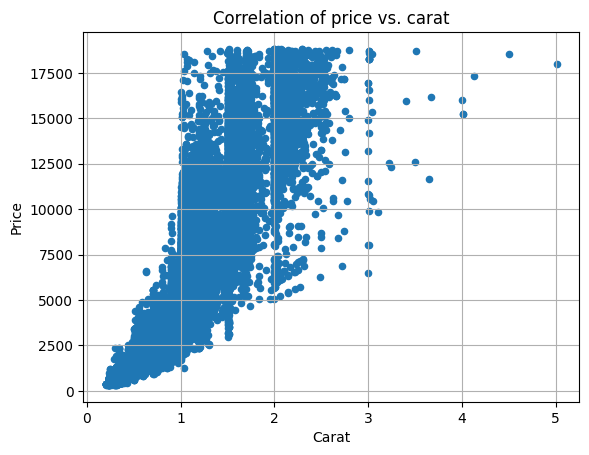

In [326]:
df.plot(kind="scatter", x="carat", y="price",
            title = "Correlation of price vs. carat",
            xlabel = "Carat",
            ylabel = "Price",
            grid=True)


above scatterplot shows that there are outliers. These are the points that are much farther away from the other points in the scatter plot.

<Axes: >

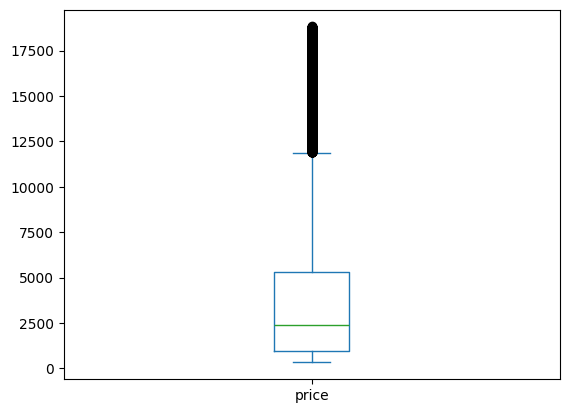

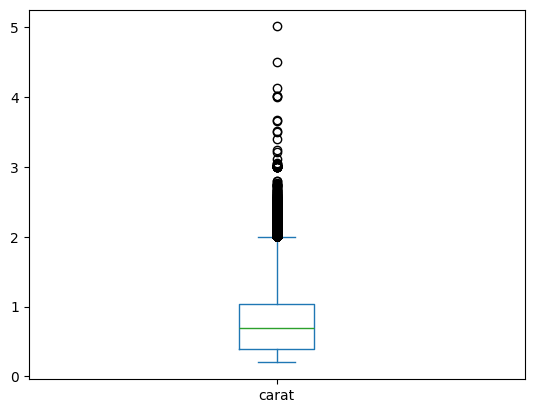

In [327]:
df.plot(kind="box", column=['price'])
df.plot(kind="box", column=['carat'])


The boxplot figures further proves that there is a lot of outliers(black dots) in both variables.

##### Assumption 4: Checking the Linear Relationship.

<Axes: title={'center': 'Correlation of price vs. carat'}, xlabel='Carat', ylabel='Price'>

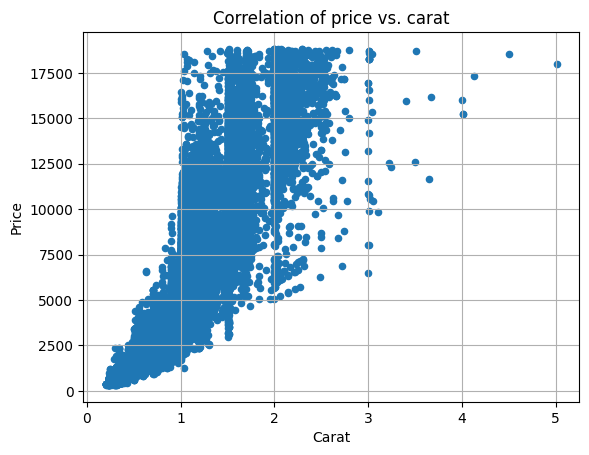

In [328]:
df.plot(kind="scatter", x="carat", y="price",
            title = "Correlation of price vs. carat",
            xlabel = "Carat",
            ylabel = "Price",
            grid=True)

From the scatter plot we can see that there is linear relationship between the price and carat.

After inspecting all of the assumptions we got Quantitative data and linear relationship on the positive and dataset being normally distibued and no outliers in negative. If there is one or more assumption being false we should use the Spearman test to check our hypothesis.

#### Correlation Test:


In [329]:
corr, _ = stats.spearmanr(df["price"], df["carat"])

print(f"The Correlation value between price & carat Count is: {corr}")

The Correlation value between price & carat Count is: 0.9628827988813001


The Correlation value is really close to 1 so it would suggest that it has a <u>Strong Positive Correlation</u> between price & carat. We can visualize the correlation between the two through a Scatter Plot as well:


<Axes: title={'center': 'Correlation of price vs. carat'}, xlabel='Carat', ylabel='Price'>

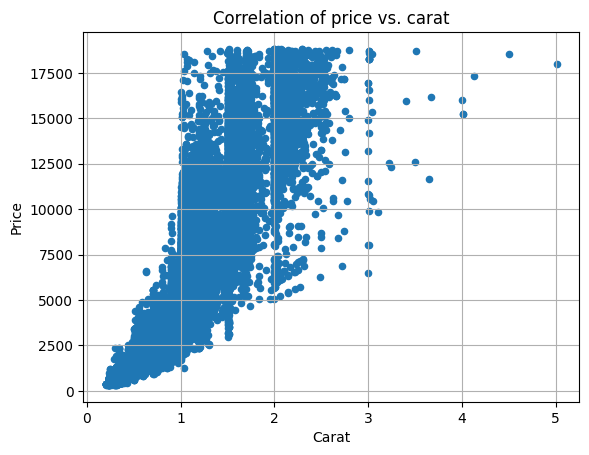

In [330]:
df.plot(kind="scatter", x="carat", y="price",
            title = "Correlation of price vs. carat",
            xlabel = "Carat",
            ylabel = "Price",
            grid=True)

There is a positive correlation clearly visible. As the majority of carat is greater the 1 are associated with an price of 10000 - 12500. Overall we can go with our Alternative Hypothesis that there is definitely a correlation between price and carat.(<i>Ieuan 2023,p.10</i>)

### One-Way ANOVA

<b>Is there a significant difference in price of diamonds from different colors?</b>


<u>Null hypothesis (H0)</u>: There is no significant difference in the mean price of diamonds from different colors.<br>
<u>Alternative hypothesis (H1)</u>: There is a significant difference in the mean price of diamonds from different colors. <br>

H0: µ_D = µ_E = µ_F = µ_G = µ_H = µ_I = µ_J<br>
H1: At least one mean is different<br>
µ = means of every color group

#### Assumption

There are 7 different colors within our test. That is 7 groups, from one independent variable color. As such, we should consider a one-way ANOVA. However, before conducting this test, we should determine whether or not the assumption for such a test hold. Otherwise, we will need to utilize the non-parametric version of the test. Which is <b>Krushkal-wallis Test</b>.


- Dependent Variable in continuous
- Independent Observations
- Normally Distributed.
- Equal Variance (Homogenity of Variances)

#### Assumption 1: Independent Observations
In here the price of diamond is the dependent variable. The price of a diamond ring can take any value within a ranged depending on the quality.


#### Assumption 2: Dependent Variable in continuous

There cannot be a single diamond that is measured more than once, and appears in more than one group. Given this is by color, we can safely assume that one diamond is not been measured twice, in two separate color.

#### Assumption 3: Normally Distributed.

array([<Axes: title={'center': 'D'}, ylabel='Frequency'>,
       <Axes: title={'center': 'E'}, ylabel='Frequency'>,
       <Axes: title={'center': 'F'}, ylabel='Frequency'>,
       <Axes: title={'center': 'G'}, ylabel='Frequency'>,
       <Axes: title={'center': 'H'}, ylabel='Frequency'>,
       <Axes: title={'center': 'I'}, ylabel='Frequency'>,
       <Axes: title={'center': 'J'}, ylabel='Frequency'>], dtype=object)

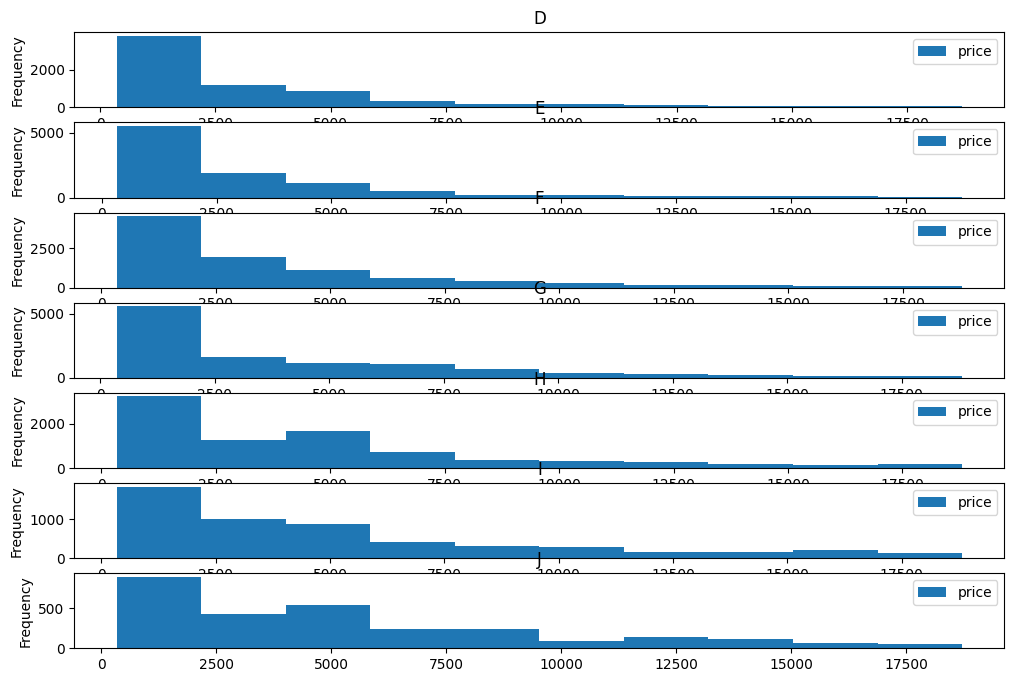

In [331]:
df.plot(kind="hist", by="color", column=["price"],
                figsize=(12,8))

We cant fully understand whether this is normally distributed or not. Next we are going to use Shaprio Wilk's test


In [332]:
func = stats.shapiro
norm_test = df.groupby(by="color")["price"].apply(func)

print(f"D: {norm_test['D']} \nE: {norm_test['E']} \nF: {norm_test['F']}\nG: {norm_test['G']} \nH: {norm_test['H']} \nI: {norm_test['I']} \nJ: {norm_test['J']}")

D: ShapiroResult(statistic=0.743565022945404, pvalue=0.0) 
E: ShapiroResult(statistic=0.7287381887435913, pvalue=0.0) 
F: ShapiroResult(statistic=0.7838656306266785, pvalue=0.0)
G: ShapiroResult(statistic=0.8052394390106201, pvalue=0.0) 
H: ShapiroResult(statistic=0.841345489025116, pvalue=0.0) 
I: ShapiroResult(statistic=0.8536195755004883, pvalue=0.0) 
J: ShapiroResult(statistic=0.8894203305244446, pvalue=6.114986238620637e-41)


c:\Users\kazia\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Using our Shaprio Wilk's test for normality, there is evidence to suggest that at a 5% significance level (p-value < 0.05), that may prove it's not normally distributed.


#### Assumption 4: Equal Variance (Homogenity of Variances)

The color of diamond from each color, have a similar spread in terms of D, E, F, G, H, I, J color individuals.  This can be tested via the <u>Levene's Test</u>.

In [340]:
d_df = df[df["color"] == "D"]["price"]
e_df = df[df["color"] == "E"]["price"]
f_df = df[df["color"] == "F"]["price"]
g_df = df[df["color"] == "G"]["price"]
h_df = df[df["color"] == "H"]["price"]
i_df = df[df["color"] == "I"]["price"]
j_df = df[df["color"] == "J"]["price"]


lev_result = stats.levene(d_df, e_df, f_df, g_df,h_df,i_df,j_df)




print(f"The Levene's Test: {lev_result}")

The Levene's Test: LeveneResult(statistic=219.11698866851648, pvalue=1.7994732197087182e-277)


The Levene's Test also suggest that it's not equal variance because it's really smaller than p <<< 0.05.

After checking all the Assumption we see the datasets are not normally distributed and they are not equal variance. For us to check the hypothesis we need to use non parametric test Krushkal-wallis(<i>scipy.stats.kruskal, n.d.</i>).

In [368]:
kruskal_res = stats.kruskal(d_df, e_df, f_df, g_df,h_df,i_df,j_df)

print(f"The kruskal's Test: {kruskal_res}")

The kruskal's Test: KruskalResult(statistic=1335.570626350983, pvalue=2.1580813998043093e-285)


The results of the Kruskal Wallis, suggests that at the 5% significance level, there is a significant difference between the groups. As such, no information to accept the null-hypothesis that the price of diamond from each color are the same. (<i>Kruskal-Wallis Test: Definition, Formula, and Example, 2019</i>)


color
D    Axes(0.125,0.11;0.775x0.77)
E    Axes(0.125,0.11;0.775x0.77)
F    Axes(0.125,0.11;0.775x0.77)
G    Axes(0.125,0.11;0.775x0.77)
H    Axes(0.125,0.11;0.775x0.77)
I    Axes(0.125,0.11;0.775x0.77)
J    Axes(0.125,0.11;0.775x0.77)
Name: price, dtype: object

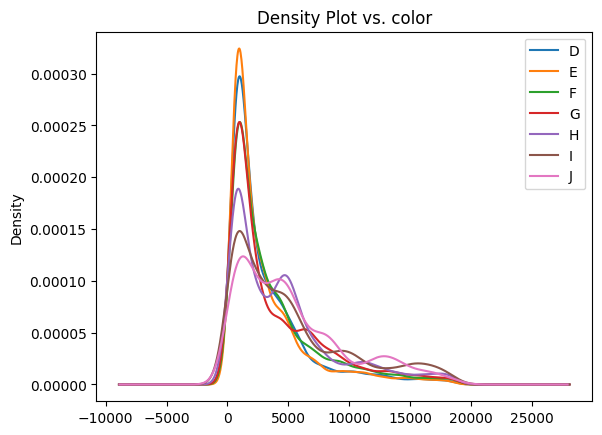

In [377]:
df.groupby("color")["price"].plot.kde(title="Density Plot vs. color",
                                   ylabel="Density",
                                   xlabel="Price",
                                   legend=['D', 'E', 'F', 'G', 'H', 'I', 'J'])

price    Axes(0.125,0.11;0.775x0.77)
dtype: object

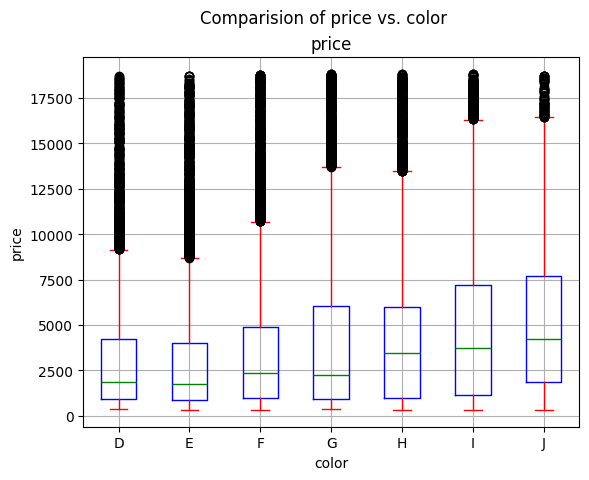

In [378]:
df.plot(kind="box", by="color", column=["price"],
                color=dict(boxes='b', whiskers='r', medians='g', caps='r'),
                title="Comparision of price vs. color",
                xlabel="color",
                ylabel="price",
                grid=True)

Above boxplot and density plot further proves the alternative hypothesis that there is a significant difference between the price of diamond rings with different color. All of them are not contained with each other.(<i>Ieuan 2023,p.19</i>)

# 3.Linear Regression

## Assesment Task

<b> Need to create a design a predictive model capable of predicting the price of a diamond ring based on the features Utilising Multiple Linear Regression</b>

We will be using <b>Multiple Linear Regression</b>. The reason for using multiple Linear Regression is the independent variables(features) are more than one.

The Mathematical formula for Multiple Linear Regression is : <i>y = b<sub>1</sub>x<sub>1</sub> + b<sub>2</sub>x<sub>2</sub> + b<sub>3</sub>x<sub>3</sub> + b<sub>4</sub>x<sub>4</sub> + ... + b<sub>n</sub>x<sub>n</sub> + c</i> 


- Here x<sub>1</sub> , x<sub>2</sub> , x<sub>3</sub> , x<sub>4</sub>, .... ,x<sub>n</sub> are the four features of the data (color, clarity, weight (Carat Size), cut quality). <br>
- Here b<sub>1</sub> , b<sub>2</sub> , b<sub>3</sub> , b<sub>4</sub>, .... , b<sub>n</sub> are the parameters of the data which can be trained based on the data.<br>
- Here c is the intercept without considering other features.

In [379]:
df.head()

,carat,cut,color,clarity,price,clarity_rating,color_rating,cut_rating
0,0.23,Ideal,E,SI2,326,2,6,5
1,0.21,Premium,E,SI1,326,3,6,4
2,0.23,Good,E,VS1,327,5,6,2
3,0.29,Premium,I,VS2,334,4,2,4
4,0.31,Good,J,SI2,335,2,1,2


In [380]:

# Dependent Variable y
y = df['price']

#Independent Variable x((color, clarity, weight (Carat Size), cut quality))
x = df[['carat','clarity_rating','color_rating','cut_rating']]

# Add intercept to the model (c)
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 1.272e+05
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:52:26   Log-Likelihood:            -4.6053e+05
No. Observations:               53940   AIC:                         9.211e+05
Df Residuals:                   53935   BIC:                         9.211e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -7218.5545     33.296   -216.

## Interpatation of Initial model
<ul>
<li><b>R-squared</b> : The value is 0.909 which means 90% diamonds price can be explained by the four features of the dataset (color, clarity, weight (Carat Size), cut quality).<br></li>
<li><b>coef</b> : The values are carat 8783.330, clarity 524.8435, color 319.6727, cut 155.6999.<br> For every unit increase of the respective features coef the price of the diamond will increase. For carat price will increase 8761.330, for clarity 523.7036, for color 319.2352, for cut 136.5558.<br></li>
<li><b>P>|t|</b> : All the values are 0 as they are less than 5% which means all features are statistically significant.<br></li>
<br>
For contant coef it means if all other features are 0 the diamond will cost 3378.7552 which is not acceptable. So we need to do a model without Constant.
</ul>




In [381]:
# Dependent Variable y
y = df['price']

#Independent Variable x((color, clarity, weight (Carat Size), cut quality))
x = df[['carat','clarity_rating','color_rating','cut_rating']]


model = sm.OLS(y,x).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          1.348e+05
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                        0.00
Time:                        15:52:26   Log-Likelihood:                     -4.7743e+05
No. Observations:               53940   AIC:                                  9.549e+05
Df Residuals:                   53936   BIC:                                  9.549e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

Without constant the R-square value has no change. all the values of P>|t| is lower than 5%. That means no need to do extra testings.

## Assumptions

<b>Assumption #1:</b> There exists a linear relationship between the predictor variables and the response variable



c:\Users\kazia\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


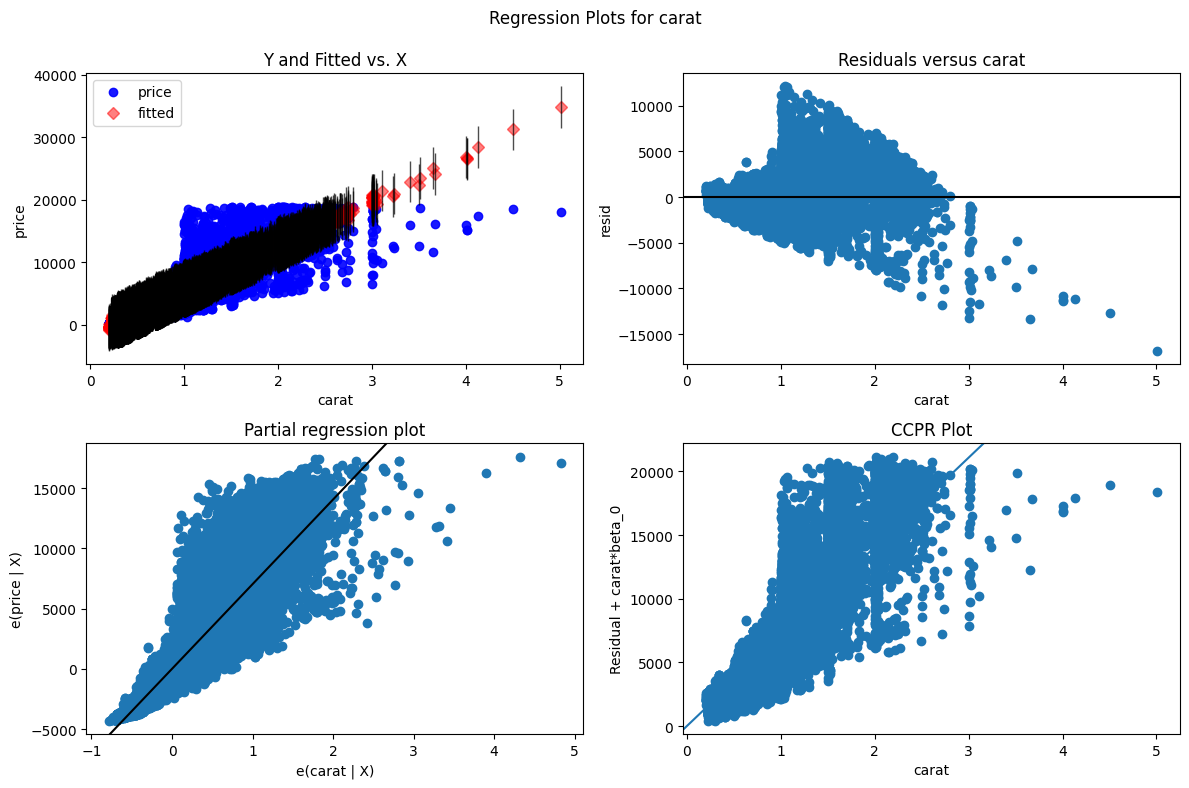

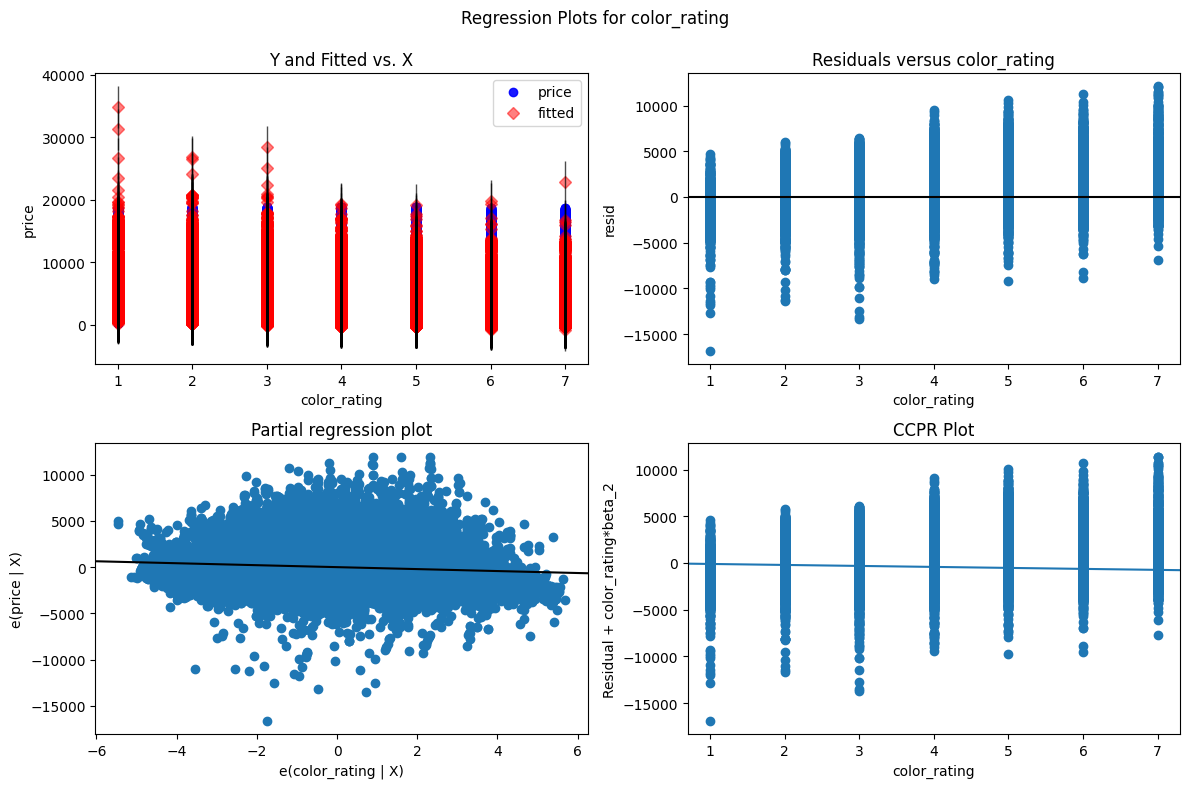

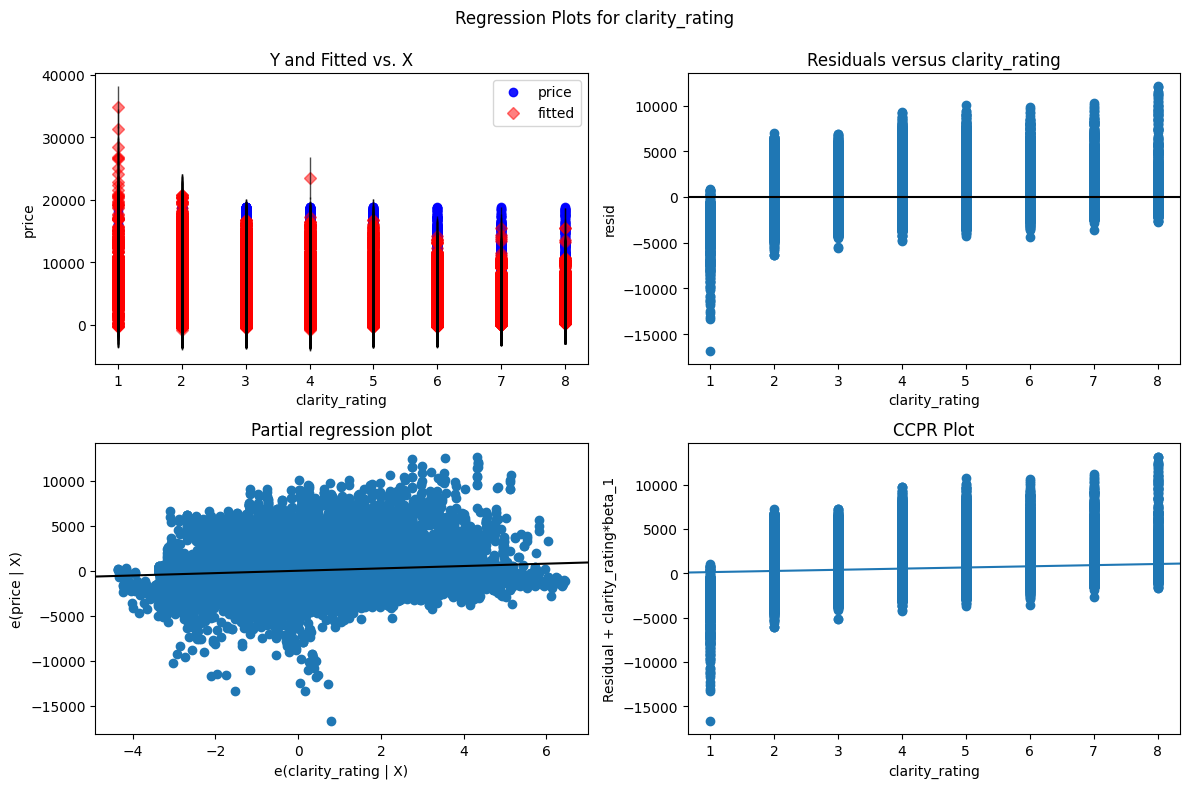

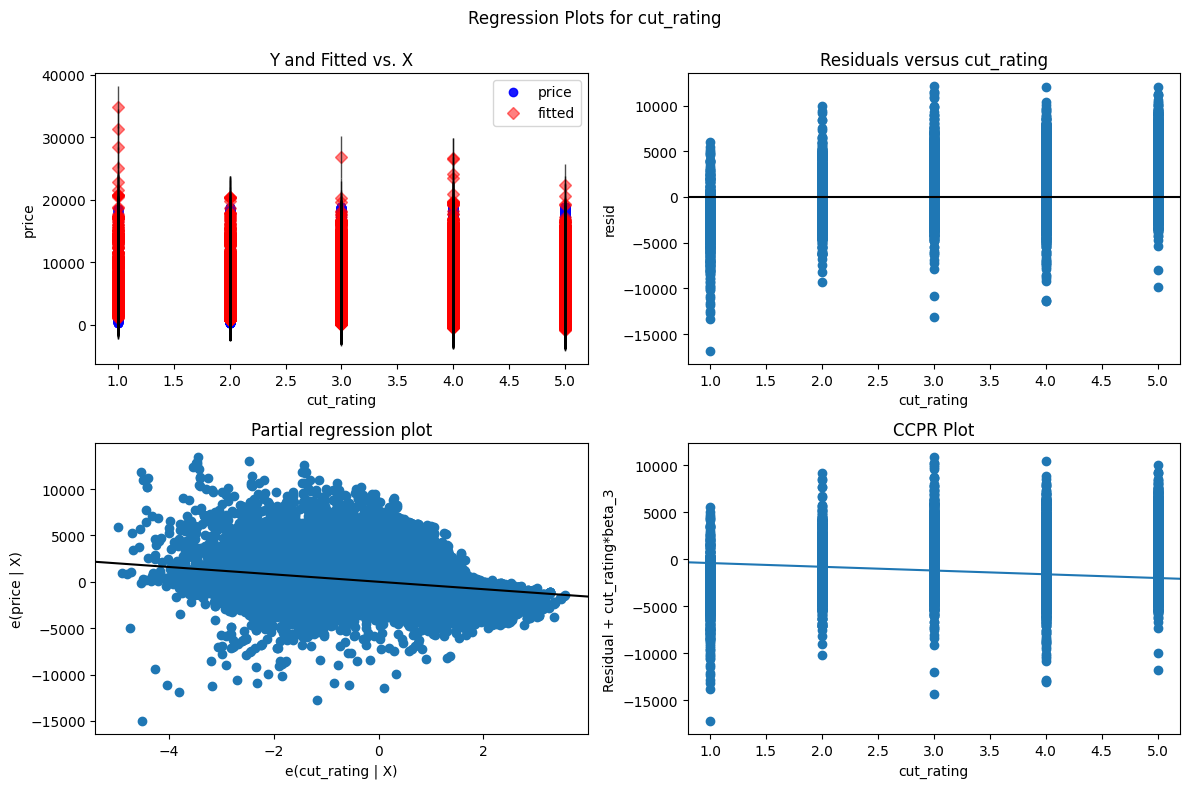

In [382]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'carat', fig=fig)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'color_rating', fig=fig)

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'clarity_rating', fig=fig)


fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'cut_rating', fig=fig)


The residual plots show that the residuals are not randomly scattered around zero they are either cone shaped and have clusters, which indicates that heteroskedasticity is a problem with predictor variable in the model.

<b>Assumption #2:</b> Durbin-Watson Test



In [383]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)


0.8619351774992802

The test statistic is 0.8619351774992802. Since this is not within the range of 1.5 and 2.5, we would consider autocorrelation to be problematic in this regression model.

<b>Assumption #3:</b>  Normality of residuals.

As the Data is over 2000 we use  Jarque-Bera Test. JB p-value is 0.0 which is less than 5% so we can say that data has skewness and kurtosis that is significantly different from a normal distribution .


### The the linear relationship between each variable and its affect on the price 




In [384]:
model = sm.OLS(y,x).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          1.348e+05
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                        0.00
Time:                        15:52:39   Log-Likelihood:                     -4.7743e+05
No. Observations:               53940   AIC:                                  9.549e+05
Df Residuals:                   53936   BIC:                                  9.549e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

As we can see from the above summary is that if carat, clarity positive. if any of these increases  the price will increase.also as the  color, cut is negative. if any of these decreases the price will increase.

### Identify & discuss the ‘base’ value of a diamond ring regardless of its features

If all the features data is 0 then base price will be 0. to get a base value all the data should be  at least 1.



In [386]:
X  = 1
base_value = 7026.2031 * X + 131.2475  * X - 105.7044  * X - 398.4362 * X

print(base_value)

6653.31


Regardless of the feature base value of the diamond should be 6653.31

Every assumption was failed for this model which mean two thing it's either multiple linear regression is not good for this model or there is a lot of outliers.

## References

<i> Ieuan, G. (2023) Additional Resource multiple Linear Regression,n.d</i> [Accesed On: 11th November 2023]

<i> Ieuan, G. (2023)  CS4S767 - Data Mining (Week 4).pdf,n.d</i> [Accesed On: 11th November 2023]

<i> Brilliance. (n.d.). Retrieved from What is an Ideal Cut for a Diamond?: https://www.brilliance.com/what-is-an-ideal-cut-for-a-diamond </i> [Accesed On: 11th November 2023]

<i> Diamond Buying Guide – The 4 Cs. (n.d.). Retrieved from The Diamond Store: https://news.thediamondstore.co.uk/gemstones-birthstones/diamond-learning/the-four-cs-the-4-cs-diamond-buying-guide/?utm_term=&utm_campaign=UK_Birthstone+Gifts&utm_source=adwords&utm_medium=ppc&hsa_acc=6538513890&hsa_cam=12526467484&hsa_grp=119735797432&h </i> [Accesed On: 11th November 2023]

<i>Diamond Clarity | Clarity Chart, Scale, & Your FAQs Answered. (n.d.). Retrieved from Brilliant Earth: https://www.brilliantearth.com/en-gb/diamond/buying-guide/clarity/?utm_source=google&utm_medium=cpc&utm_campaign=SEM_Pmax_UK_UK002&gad_source=1&gclid=CjwKCAiAxreqBhAxEiwAfGfndJwX6YpYad9S1D96q3nnLWBmh-9iSppEpPGP-lRdeIeUXKVifF32_RoCbSAQAvD_BwE</i> [Accesed On: 11th November 2023]

<i>fried, M. (2023, August 17). Understanding Diamond Depth and Table. Retrieved from The Diamond Pro: https://www.diamonds.pro/education/diamond-depth-and-table/</i> [Accesed On: 11th November 2023]

<i>How to Drop First Column in Pandas DataFrame (3 Methods) - Statology. (2021, October 27). Retrieved from statology: https://www.statology.org/pandas-drop-first-column/</i> [Accesed On: 11th November 2023]

<i>Kruskal-Wallis Test: Definition, Formula, and Example. (2019, January 01). Retrieved from Statology: https://www.statology.org/kruskal-wallis-test/</i> [Accesed On: 11th November 2023]

<i>SciPy. (n.d.). Retrieved from https://scipy.org/: https://scipy.org/</i> [Accesed On: 11th November 2023]

<i>scipy.stats.kruskal. (n.d.). Retrieved from Scipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html</i> [Accesed On: 11th November 2023]

<i>Statistical functions (scipy.stats) — SciPy v1.11.3 Manual. (n.d.). Retrieved from SciPy: https://docs.scipy.org/doc/scipy/reference/stats.html</i> [Accesed On: 11th November 2023]

<i>What are the factors that determine the price of diamonds? (n.d.). Retrieved from i-diamants: https://www.i-diamants.com/en/diamond-price-factors.html,01324#:~:text=of%20a%20diamond.-,The%20main%20factors%20that%20determine%20the%20price%20of%20diamonds%20are,cut%20quality%20and%20carat%20weight.</i> [Accesed On: 11th November 2023]

